In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors_dict = {
    "Red": "#8c0404",
    "Pink": "#f25ed0",
    "Black": "#000000",
    "Green": "#16A085",
    "Dark Blue": "#34495E",
    "Navy Blue": "#21618C",
    "Purple": "#512E5F",
    "Turquoise": "#45B39D",
    "Gray": "#AAB7B8",
    "Light Blue": "#20B2AA",
    "Hot Pink": "#FF69B4",
    "Dark Turquoise": "#00CED1",
    "Coral": "#FF7F50",
    "Lime": "#7FFF00",
    "Orchid": "#DA70D6"
}

In [2]:
df= pd.read_csv('/kaggle/input/car-accident-dataset/Road Accident Data.csv')

<div style="text-align:center; background-color:#ffeeba; padding:20px;">
  <h1 style="font-size:36px; color:#dc3545;"><b>1.EDA and Data Cleaning</b></h1>
</div>


In [3]:
df.head(5)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [5]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [6]:
# Drop Unbalanced columns
df.drop(columns='Carriageway_Hazards', inplace=True)

# Fill missing values with most frequent values
most_freq_surface_conditions = df['Road_Surface_Conditions'].mode()[0]
df['Road_Surface_Conditions'].fillna(most_freq_surface_conditions, inplace=True)

most_freq_road_type = df['Road_Type'].mode()[0]
df['Road_Type'].fillna(most_freq_road_type, inplace=True)

#replace vales in Accident_Severity columns
df['Accident_Severity'].replace('Fetal', 'Fatal', inplace=True)

#drop unwanted columns
df.drop(columns=['Latitude', 'Longitude','Junction_Control','Local_Authority_(District)','Police_Force'], inplace=True)

In [7]:
# Mapping between Road Surface Conditions and corresponding Weather Conditions ttto fill the missing values
conditions_mapping = {
    'Dry': 'Fine no high winds',
    'Wet or damp': 'Raining no high winds',
    'Snow': 'Snowing no high winds',
    'Frost or ice': 'Snowing + high winds'
}

df['Weather_Conditions'].fillna(df['Road_Surface_Conditions'].map(conditions_mapping), inplace=True)
df['Weather_Conditions'].fillna('Other', inplace=True)

In [8]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [9]:
# Extract  only the daily hour of each accident
df['Time']= df['Time'].str.split(':').str[0]

# Convert 'Time' column to float
df['Time'] = df['Time'].astype(float)

# Calculate the mean of the 'Time' column
mean_time = df['Time'].mean().round(0)

# Fill missing values in the 'Time' column with the calculated mean
df['Time'].fillna(mean_time, inplace=True)

# Rename Columns name
df = df.rename(columns={'Accident_Severity': 'Accident_Injuries', 'Number_of_Casualties': 'death_toll' , 'Accident_Index': 'Accident_ID' , 'Time':'Hour_of_Accident'})

In [10]:
# Creating a Pivot Table to analyze number of death values based on 'Accident Date' and 'Hour_of_Accident'
pivot_table = pd.pivot_table(df, values='death_toll', index=[ 'Accident Date'], columns='Hour_of_Accident', fill_value=None).round(0)
pivot_table

Hour_of_Accident,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Accident Date,,,,,,,,,,,,,,,,,,,,,
1/1/2021,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1/1/2022,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
1/10/2021,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1/10/2022,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
1/11/2021,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/7/2022,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
9/8/2021,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
9/8/2022,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [11]:
category_mapping = {
    'Car': 'Car',
    'Taxi/Private hire car': 'Taxi',
    'Motorcycle over 500cc': 'Motorcycle',
    'Van / Goods 3.5 tonnes mgw or under': 'Van',
    'Goods over 3.5t. and under 7.5t': 'Other',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle',
    'Bus or coach (17 or more pass seats)': 'Bus',
    'Goods 7.5 tonnes mgw and over': 'Other',
    'Other vehicle': 'Other',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Agricultural vehicle': 'Other',
    'Minibus (8 - 16 passenger seats)': 'Other',
    'Pedal cycle': 'Pedal cycle',
    'Ridden horse': 'Ridden horse'
}

# Map values in 'Vehicle_Type' column to the specified categories
df['Vehicle_Type'] = df['Vehicle_Type'].map(category_mapping)

df['Vehicle_Type'].unique()

array(['Car', 'Taxi', 'Motorcycle', 'Van', 'Other', 'Bus', 'Pedal cycle',
       'Ridden horse'], dtype=object)

<div style="text-align:center; background-color:#d4edda; padding:20px;">
  <h1 style="font-size:36px; color:#28a745;"><b>2. Data Visualization</b></h1>
</div>


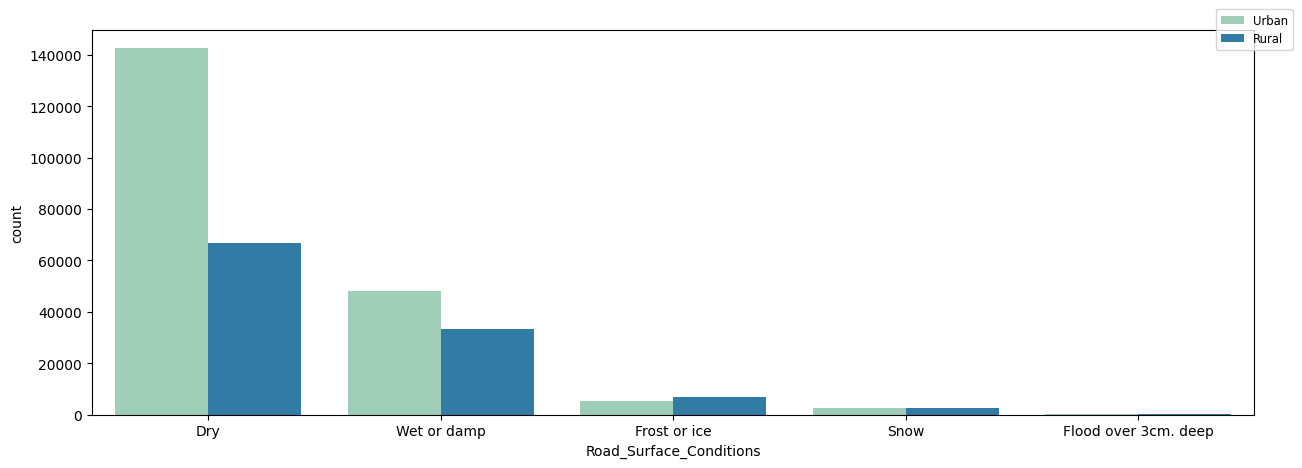

In [12]:
# Create a figure with a specified size (width=15, height=5)
plt.figure(figsize=(15, 5))

# Create a count plot to visualize the distribution of accidents based on road surface conditions
sns.countplot(data=df, x='Road_Surface_Conditions', palette="YlGnBu", hue='Urban_or_Rural_Area')

# Add a legend to the upper left corner outside the plot area
plt.legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')

Text(0, 0.5, ' ')

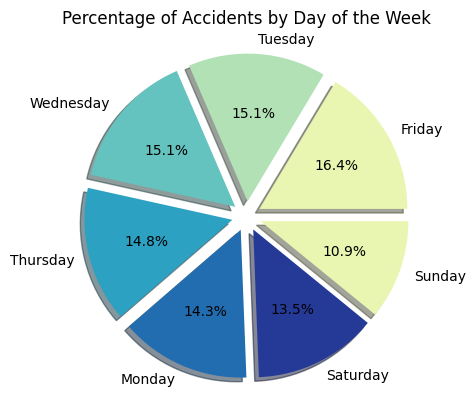

In [13]:
#make a pie chart to display thee percentage of accident per each day
df['Day_of_Week'].value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], shadow=True, colors=sns.color_palette("YlGnBu"))
plt.title('Percentage of Accidents by Day of the Week')
plt.ylabel(' ')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0')])

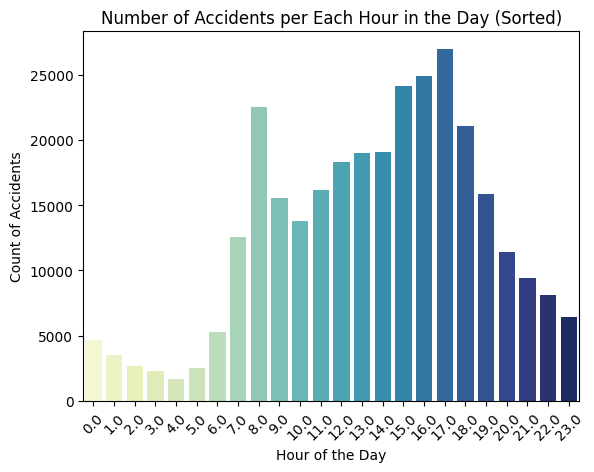

In [14]:
# Create a Bar plot to display the number of accidents per each hour in the day
df_sorted = df.sort_values(by='Hour_of_Accident')
sns.countplot(data=df_sorted, x='Hour_of_Accident',  palette="YlGnBu")
plt.title('Number of Accidents per Each Hour in the Day (Sorted)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Accidents')
plt.xticks(rotation =45)

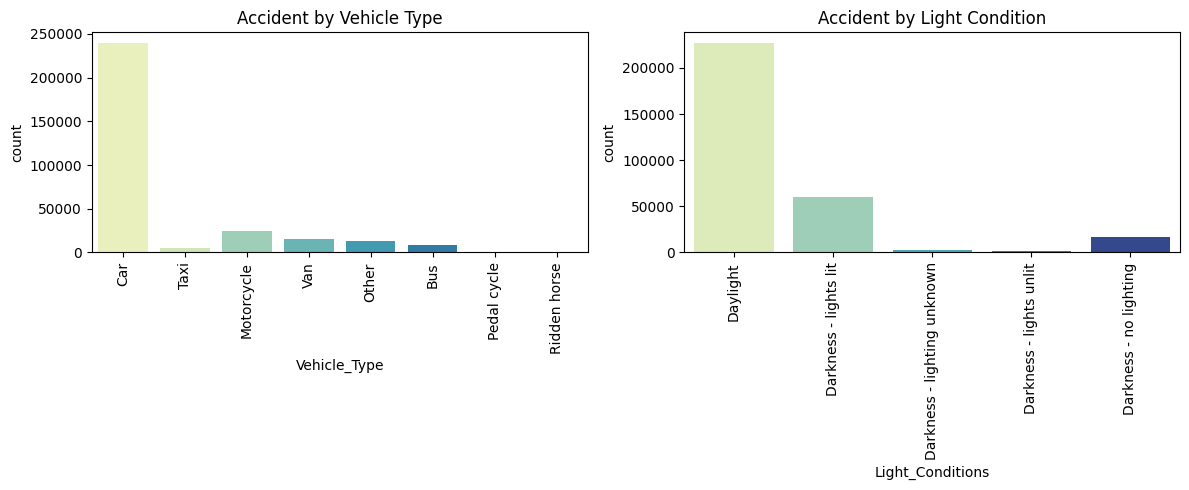

In [15]:
plt.figure(figsize=(12, 5))

# First subplot: Accident by vehicle type
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Vehicle_Type", palette="YlGnBu")
plt.title('Accident by Vehicle Type')
plt.xticks(rotation=90)

# Second subplot: Accident by light condition
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Light_Conditions", palette="YlGnBu")
plt.title('Accident by Light Condition')
plt.xticks(rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()

Text(0, 0.5, 'Percentage of Accidents')

<Figure size 1500x500 with 0 Axes>

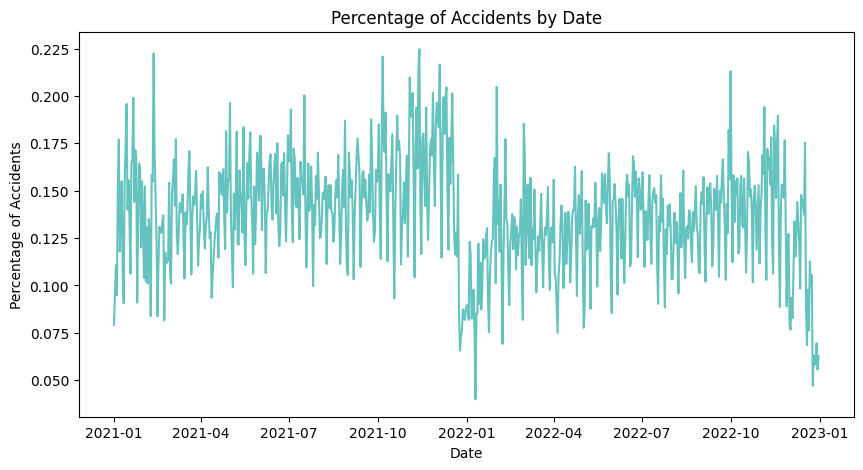

In [16]:
# Create a line chart to calculate the percentage of accidents for each date
plt.figure(figsize=(15,5))
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
date_counts = df['Accident Date'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 5))
sns.lineplot(x=date_counts.index, y=date_counts.values, color=sns.color_palette("YlGnBu")[2])
plt.title('Percentage of Accidents by Date')
plt.xlabel('Date')
plt.ylabel('Percentage of Accidents')

Text(0, 0.5, '')

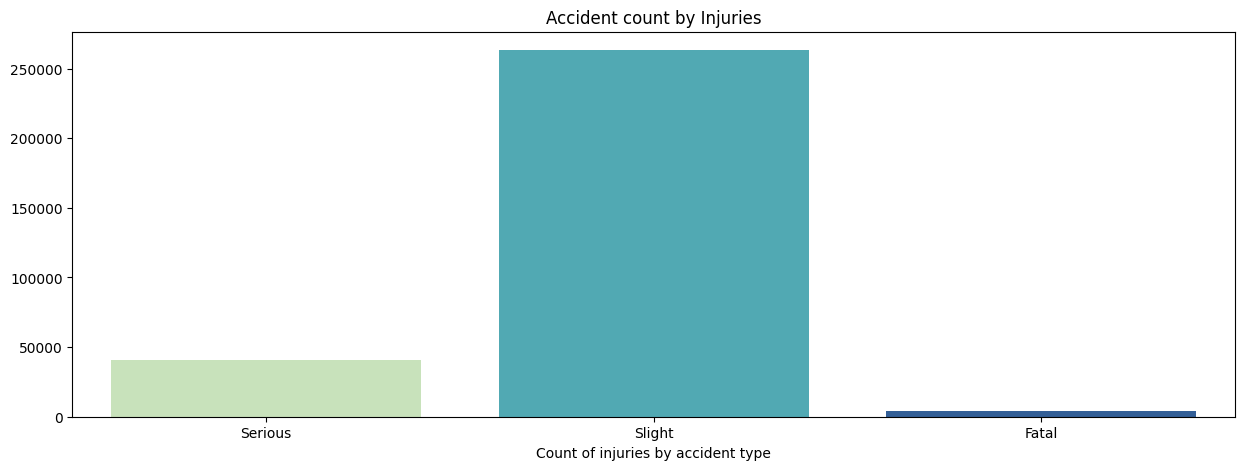

In [17]:
# Create a count plot to show the number of accident by Accident_Severity
plt.figure(figsize=(15,5))
sns.countplot(data = df, x='Accident_Injuries',palette ='YlGnBu')
plt.title('Accident count by Injuries')
plt.xlabel('Count of injuries by accident type')
plt.ylabel('')

Text(0, 0.5, 'Speed Limit')

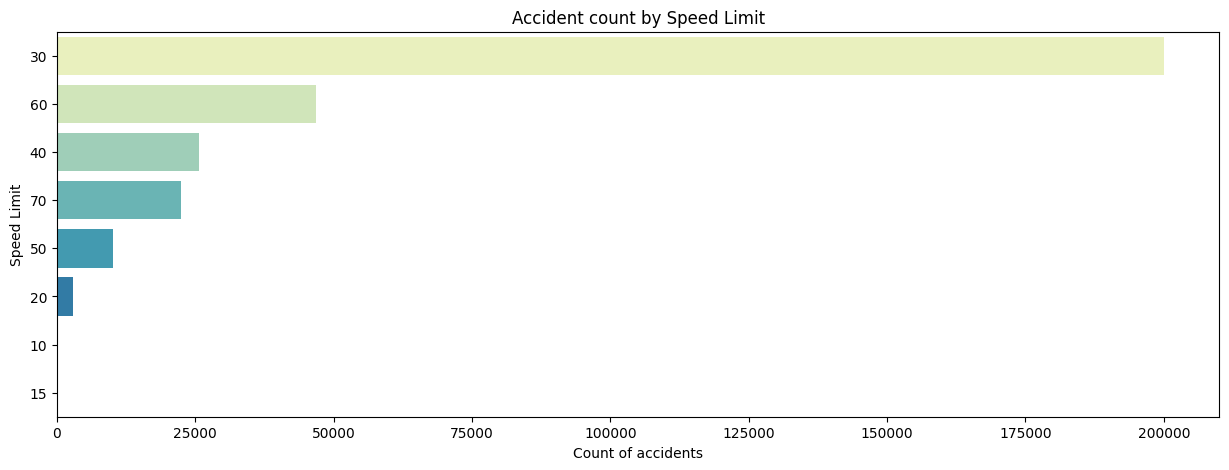

In [18]:
# Bar plot to show what is the most common accident speed limit
plt.figure(figsize = (15,5))
sns.countplot(data=df, y='Speed_limit', order=df['Speed_limit'].value_counts().index, palette='YlGnBu')
plt.title('Accident count by Speed Limit')
plt.xlabel('Count of accidents')
plt.ylabel('Speed Limit')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'T or staggered junction'),
  Text(1, 0, 'Crossroads'),
  Text(2, 0, 'Not at junction or within 20 metres'),
  Text(3, 0, 'Roundabout'),
  Text(4, 0, 'Mini-roundabout'),
  Text(5, 0, 'More than 4 arms (not roundabout)'),
  Text(6, 0, 'Private drive or entrance'),
  Text(7, 0, 'Slip road'),
  Text(8, 0, 'Other junction')])

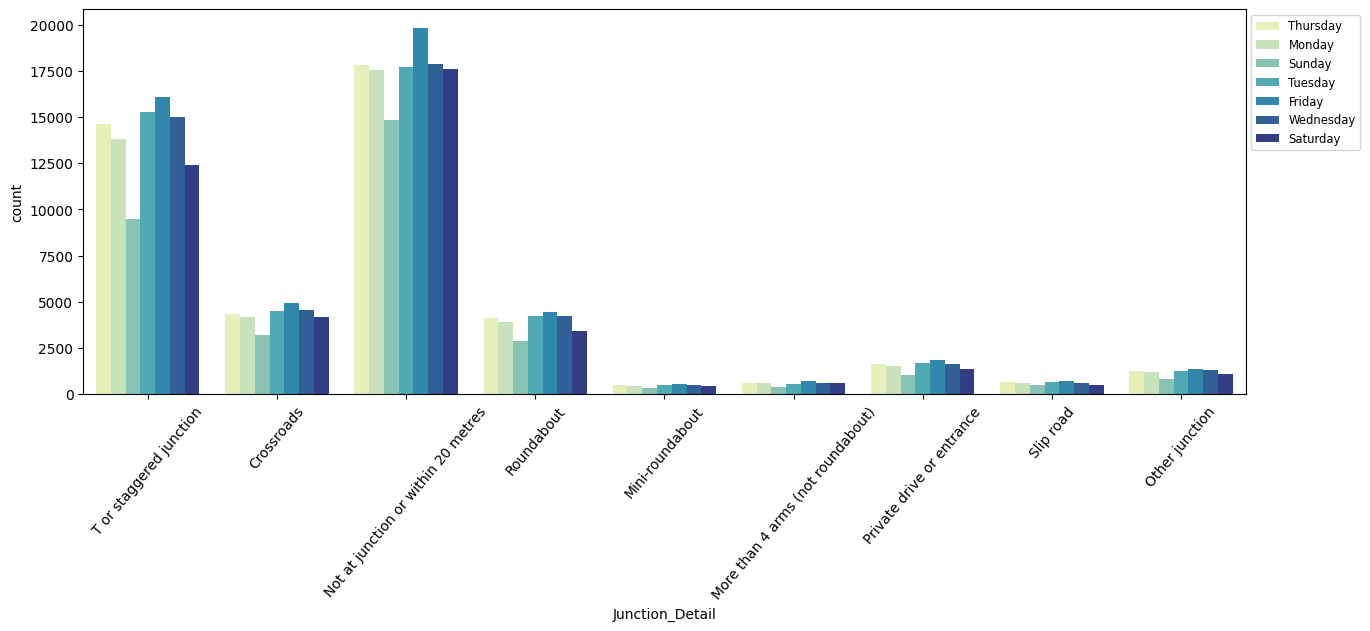

In [19]:
# Count of accident by hunction details for each day in the week
plt.figure(figsize=(15,5))
sns.countplot(data=df, x= 'Junction_Detail' ,palette="YlGnBu", hue='Day_of_Week')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.xticks(rotation = 50)

In [20]:
df.to_csv('car_accident.csv')